### Simple Watershed 

#### !!!!! only for the task of detection of cell nuclei working on to do the same for bloodcells white and red !!!!! 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
from skimage.segmentation import clear_border

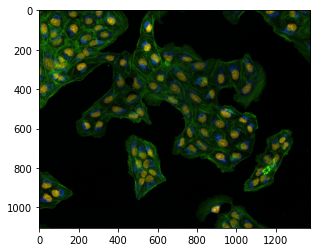

In [22]:
img = cv2.imread('../raw_data/watershed/SimpleExample/Osteosarcoma_01.tif')
plt.imshow(img);

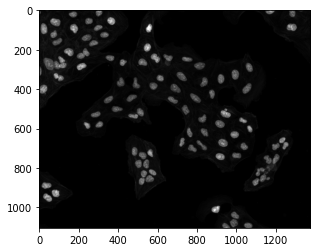

In [23]:
#blue channel, image equivalent to grey image
cell = img[:,:,0]
plt.imshow(cell, cmap='gray');

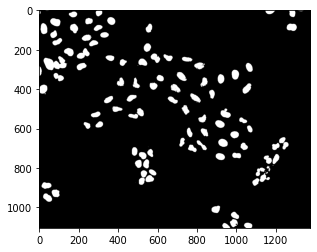

In [24]:
ret1, thresh = cv2.threshold(cell, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray');

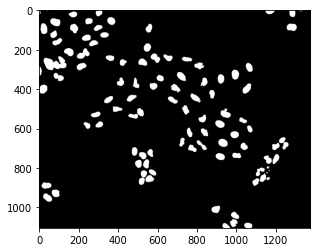

In [25]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
plt.imshow(opening, cmap='gray');

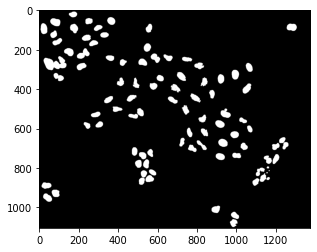

In [26]:
opening = clear_border(opening)
plt.imshow(opening, cmap='gray');

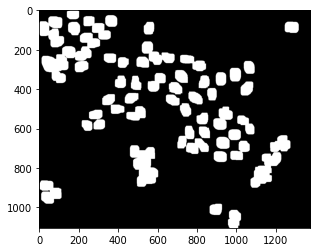

In [27]:
sure_backg = cv2.dilate(opening, kernel, iterations=10)
plt.imshow(sure_backg, cmap='gray');

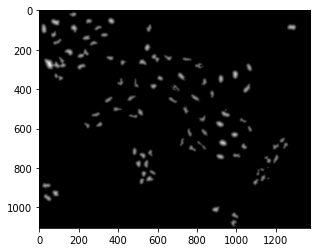

In [28]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
plt.imshow(dist_transform, cmap='gray');

In [29]:
dtf_max = dist_transform.max()
print(dtf_max)

21.968996


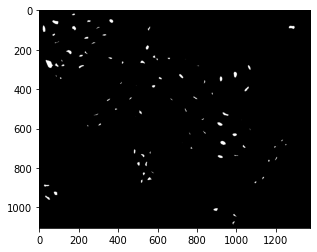

In [30]:
ret2, sure_foreg = cv2.threshold(dist_transform, 0.5*dtf_max, 255, 0)
plt.imshow(sure_foreg, cmap='gray');

In [31]:
sure_foreg = np.uint8(sure_foreg)

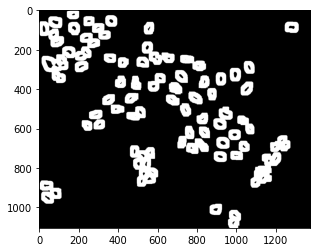

In [32]:
unknown = cv2.subtract(sure_backg,sure_foreg)
plt.imshow(unknown, cmap='gray');

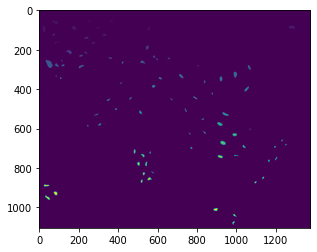

In [33]:
ret3, markers = cv2.connectedComponents(sure_foreg)
plt.imshow(markers);

In [34]:
#background pixel value 0 --> problem
#watershed would consider this as unknown 
#add 10 to all labels so that background is not 0 
markers = markers+10

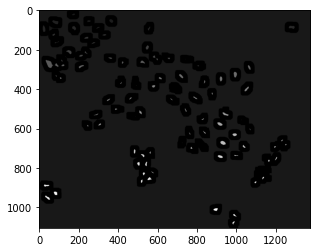

In [35]:
#mark the region of unknown with 0
markers[unknown == 255] = 0
plt.imshow(markers, cmap='gray');

In [36]:
markers = cv2.watershed(img,markers)

In [37]:
img[markers == -1] = [0,255,255]

In [38]:
img2 = color.label2rgb(markers, bg_label=0)

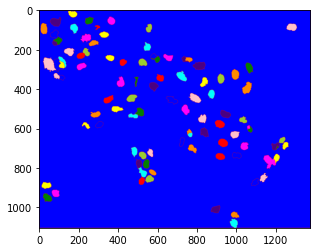

In [39]:
plt.imshow(img2);

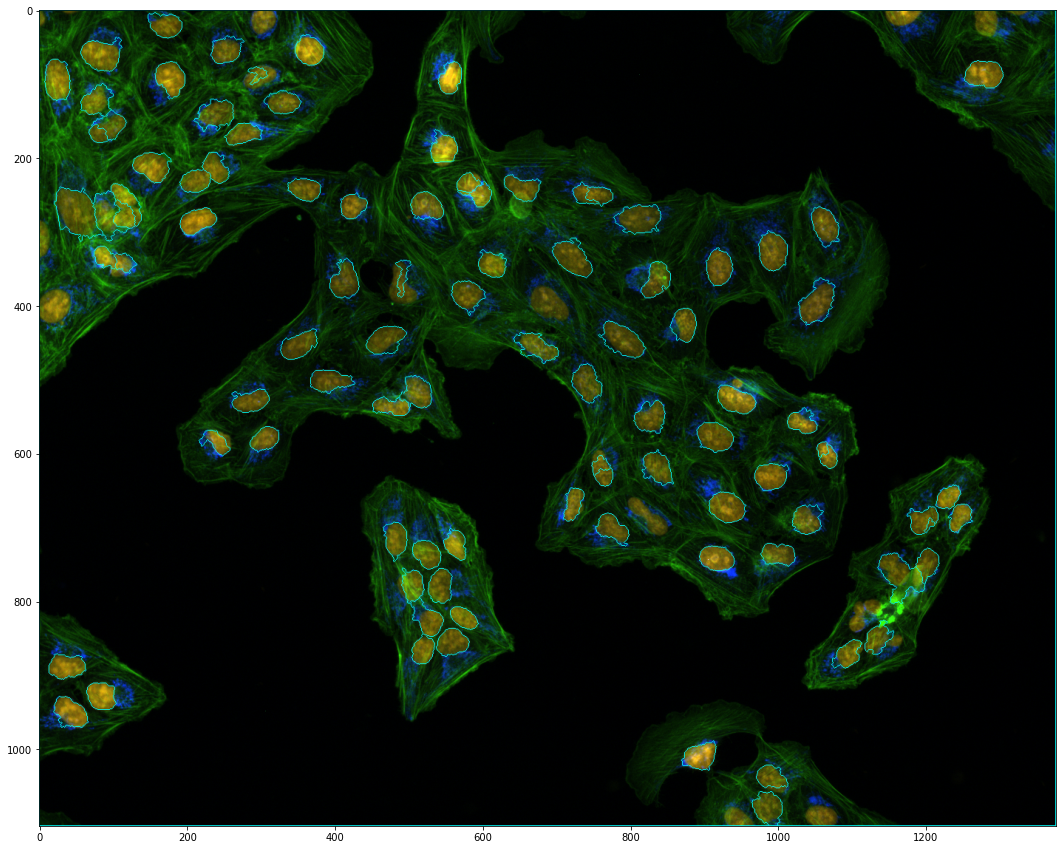

In [45]:
plt.figure(figsize=(20,15))
plt.imshow(img);